**connecting with Drive**

In [16]:
from google.colab import drive   #to connect google drive with google colab
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**loading the model**

In [17]:
import tensorflow as tf

# Load the saved model
model_path = "/content/drive/My Drive/project/first/my_classification_model.h5"
loaded_model = tf.keras.models.load_model(model_path)

# Example usage of the loaded model
loaded_model.summary()  # Print model summary


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)       

**Model prediction**

1/1 [==============================] - 1s 1s/step
Predicted Class Index: 0
Predicted Class Label: Car


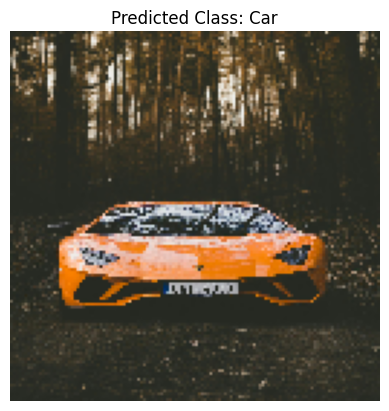

In [27]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Path to your image file
image_file_path = '/content/drive/MyDrive/project/first/22.png'

# Load the saved model
loaded_model_path = '/content/drive/MyDrive/project/first/my_classification_model.h5'
loaded_model = load_model(loaded_model_path)

# Load and preprocess the image you want to test
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize pixel values
    return img, img_array

# Preprocess the image
img, img_array = preprocess_image(image_file_path)

# Perform prediction on the preprocessed image
prediction = loaded_model.predict(img_array)

# Convert prediction to human-readable label
# (Assuming your model output is binary and you have class labels 'Car' and 'Truck')
class_labels = ['Car', 'Truck']  # Replace with your class labels
predicted_class_index = int(prediction[0][0] > 0.5)  # Assuming threshold is 0.5
predicted_class_label = class_labels[predicted_class_index]

# Print the predicted class label along with its index
print("Predicted Class Index:", predicted_class_index)
print("Predicted Class Label:", predicted_class_label)

# Display the predicted image with the predicted class label written on it
plt.imshow(img)
plt.title("Predicted Class: " + predicted_class_label)
plt.axis('off')
plt.show()
